Script started...
Running experiment for: [3]
Running for n = 3
Solvable puzzle generated!
UCS function is running....
UCS found a solution in 71628 steps!
bidirectional_search function is running....
bidirectional_search found a solution in 20 steps!
Solvable puzzle generated!
UCS function is running....
UCS found a solution in 71628 steps!
bidirectional_search function is running....
bidirectional_search found a solution in 20 steps!
Solvable puzzle generated!
UCS function is running....
UCS found a solution in 31318 steps!
bidirectional_search function is running....
bidirectional_search found a solution in 18 steps!
Solvable puzzle generated!
UCS function is running....
UCS found a solution in 254738 steps!
bidirectional_search function is running....
bidirectional_search found a solution in 24 steps!
Solvable puzzle generated!
UCS function is running....
UCS found a solution in 209642 steps!
bidirectional_search function is running....
bidirectional_search found a solution in 23 s

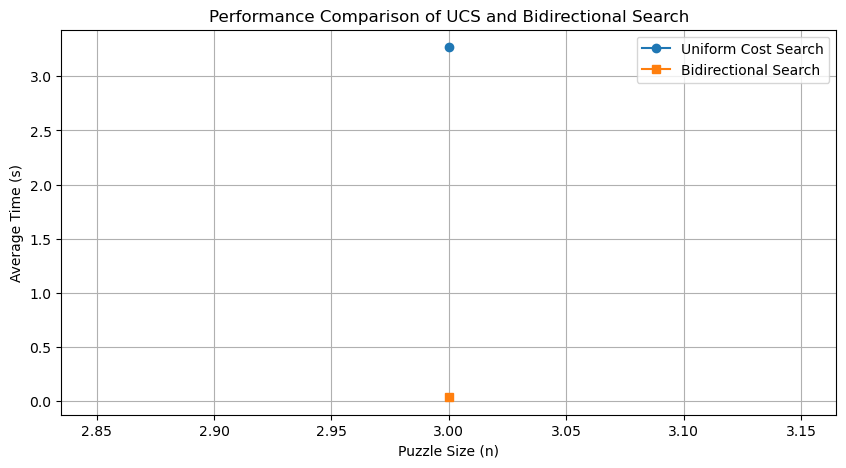

Script finished successfully!


In [26]:
import numpy as np
import random
import time
import heapq
import matplotlib.pyplot as plt
from collections import deque

# Helper functions
def generate_puzzle(n):
    puzzle = list(range(n * n))
    random.shuffle(puzzle)
    return np.array(puzzle).reshape((n, n))

def is_solvable(puzzle):
    inv_count = 0
    flat_puzzle = puzzle.flatten()
    zero_row = np.where(flat_puzzle == 0)[0] // puzzle.shape[1]
    for i in range(len(flat_puzzle)):
        for j in range(i + 1, len(flat_puzzle)):
            if flat_puzzle[i] and flat_puzzle[j] and flat_puzzle[i] > flat_puzzle[j]:
                inv_count += 1
    return (inv_count + zero_row) % 2 == 0

# Uniform Cost Search (UCS)
def ucs(puzzle, goal, max_steps=100000):
    print("UCS function is running....")
    n = len(puzzle)
    start = tuple(map(tuple, puzzle))
    goal = tuple(map(tuple, goal))
    pq = [(0, start)]
    visited = set()
    steps = 0
    while pq:
        steps += 1
        if steps > max_steps:
            print("UCS exceeded max steps. Skipping this puzzle.")
            return float('inf')
        cost, state = heapq.heappop(pq)
        if state == goal:
            print(f"UCS found a solution in {steps} steps!")
            return cost
        if state in visited:
            continue
        visited.add(state)
        zero_pos = [(r, c) for r in range(n) for c in range(n) if state[r][c] == 0][0]
        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nr, nc = zero_pos[0] + dr, zero_pos[1] + dc
            if 0 <= nr < n and 0 <= nc < n:
                new_state = [list(row) for row in state]
                new_state[zero_pos[0]][zero_pos[1]], new_state[nr][nc] = new_state[nr][nc], 0
                heapq.heappush(pq, (cost + 1, tuple(map(tuple, new_state))))
    print("UCS did not find a solution.")
    return float('inf')

# Bidirectional Search
# def bidirectional_search(puzzle, goal, max_steps=5000000):
#     print("Bidirectional search started...")
#     n = len(puzzle)
#     start = tuple(map(tuple, puzzle))
#     goal = tuple(map(tuple, goal))
#     forward_queue = deque([(start, 0)])
#     backward_queue = deque([(goal, 0)])
#     forward_visited = {start: 0}
#     backward_visited = {goal: 0}
#     steps = 0
#     while forward_queue and backward_queue:
#         steps += 1
#         if steps > max_steps:
#             print("Bidirectional Search exceeded max steps. Skipping this puzzle.")
#             return float('inf')
#     print("Bidirectional Search did not find a solution.")
#     return float('inf')

def bidirectional_search(puzzle, goal, max_steps=100000):
    print("bidirectional_search function is running....")
    n = len(puzzle)
    start = tuple(map(tuple, puzzle))
    goal = tuple(map(tuple, goal))
    forward_queue = deque([(start, 0)])
    backward_queue = deque([(goal, 0)])
    forward_visited = {start: 0}
    backward_visited = {goal: 0}
    steps = 0
    while forward_queue and backward_queue:
        steps += 1
        if steps > max_steps:
            print("bidirectional_search exceeded max steps. Skipping this puzzle.")
            return float('inf')
        for _ in range(len(forward_queue)):
            state, cost = forward_queue.popleft()
            zero_pos = [(r, c) for r in range(n) for c in range(n) if state[r][c] == 0][0]
            for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nr, nc = zero_pos[0] + dr, zero_pos[1] + dc
                if 0 <= nr < n and 0 <= nc < n:
                    new_state = [list(row) for row in state]
                    new_state[zero_pos[0]][zero_pos[1]], new_state[nr][nc] = new_state[nr][nc], 0
                    new_tuple = tuple(map(tuple, new_state))
                    if new_tuple in backward_visited:
                        print(f"bidirectional_search found a solution in {steps} steps!")
                        return cost + 1 + backward_visited[new_tuple]
                    if new_tuple not in forward_visited:
                        forward_visited[new_tuple] = cost + 1
                        forward_queue.append((new_tuple, cost + 1))
        forward_queue, backward_queue = backward_queue, forward_queue
        forward_visited, backward_visited = backward_visited, forward_visited
    print("bidirectional_search did not find a solution.")
    return float('inf')

# Experiment setup
def run_experiment(n_values, max_steps=1000000):
    results = {"UCS": [], "Bidirectional": []}
    for n in n_values:
        print(f"Running for n = {n}")
        ucs_times, bidir_times = [], []
        for _ in range(10):
            attempts = 0
            puzzle = generate_puzzle(n)
            while not is_solvable(puzzle):
                attempts += 1
                if attempts > 100:
                    print("Failed to generate a solvable puzzle. Skipping...")
                    return results
                puzzle = generate_puzzle(n)
            print("Solvable puzzle generated!")
            goal = np.arange(n * n).reshape((n, n))
            start_time = time.time()
            if ucs(puzzle, goal, max_steps) != float('inf'):
                ucs_times.append(time.time() - start_time)
            start_time = time.time()
            if bidirectional_search(puzzle, goal, max_steps) != float('inf'):
                bidir_times.append(time.time() - start_time)
        results["UCS"].append(sum(ucs_times) / len(ucs_times) if ucs_times else float('inf'))
        results["Bidirectional"].append(sum(bidir_times) / len(bidir_times) if bidir_times else float('inf'))
    return results

# Plot graph
def plot_results(n_values, results):
    plt.figure(figsize=(10, 5))
    plt.plot(n_values, results["UCS"], label="Uniform Cost Search", marker="o")
    plt.plot(n_values, results["Bidirectional"], label="Bidirectional Search", marker="s")
    plt.xlabel("Puzzle Size (n)")
    plt.ylabel("Average Time (s)")
    plt.title("Performance Comparison of UCS and Bidirectional Search")
    plt.legend()
    plt.grid()
    plt.show()

# Run and visualize
try:
    print("Script started...")
    n_values = [3]  # Start with small values for quick testing
    print("Running experiment for:", n_values)
    results = run_experiment(n_values)
    print("Experiment completed. Results:", results)
    print("Plotting results now...")
    plot_results(n_values, results)
    print("Script finished successfully!")
except Exception as e:
    print(f"Error occurred: {e}")
